# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

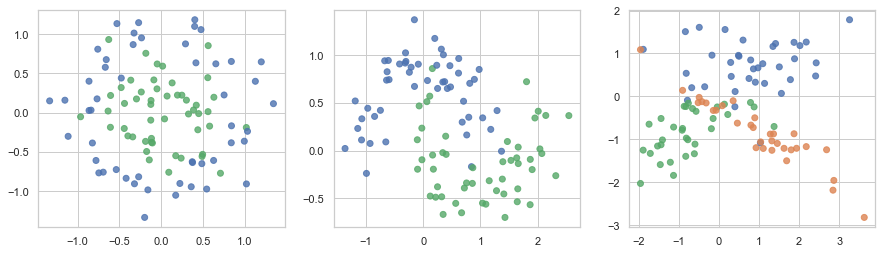

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

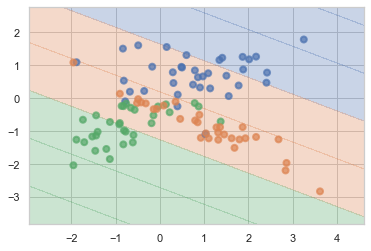

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

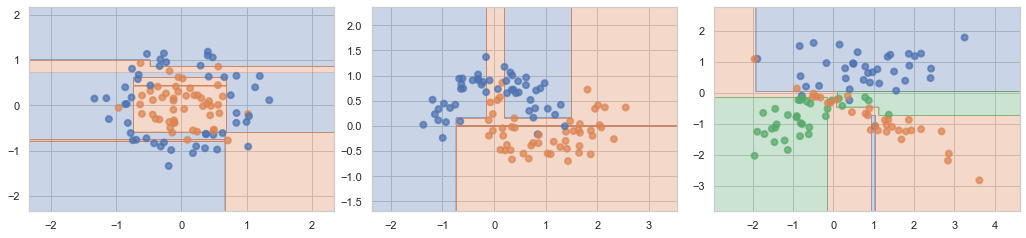

In [8]:
plt.figure(figsize=(15, 4))
train_scores = []
test_scores = []
for i, (x, y) in enumerate(datasets):
    model = DecisionTreeClassifier()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))
    plt.subplot(1, 3, i + 1)
    plot_surface(model, x, y)
    #plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

In [9]:
print(f'Accuracy на тренах: {train_scores}')
print(f'Accuracy на тестах: {test_scores}')

Accuracy на тренах: [1.0, 1.0, 1.0]
Accuracy на тестах: [0.7878787878787878, 0.8787878787878788, 0.8484848484848485]


__Ответ:__ Как видно из метрик, мы сильно переобучились, модель полностью запомнила тестовую выборку :с

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

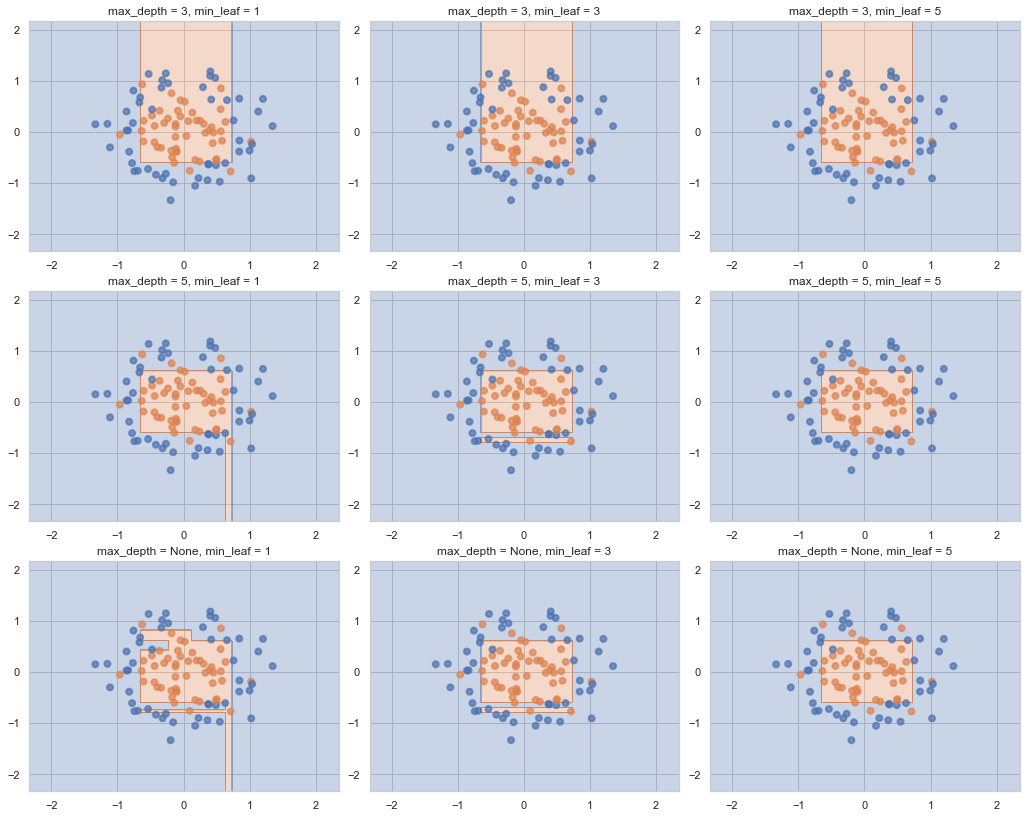

Best validation score: 0.8125
Test score: 0.8


In [10]:
plt.figure(figsize=(15, 12))
train_scores = []
test_scores = []
x, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_params = 0, 0
best_val_score = 0

i = 0
for max_depth in [3, 5, None]:
    for min_samples_leaf in [1, 3, 5]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        val_score = accuracy_score(y_val, model.predict(X_val))

        if val_score > best_val_score:
            best_val_score = val_score
            best_params = max_depth, min_samples_leaf
            
        plt.subplot(3, 3, i + 1)
        plot_surface(model, x, y)
        plt.title(f'max_depth = {max_depth}, min_leaf = {min_samples_leaf}')
        
        i += 1
        
plt.show()

model = DecisionTreeClassifier(max_depth=best_params[0], min_samples_leaf=best_params[1])
model.fit(X_train, y_train)
test_score = accuracy_score(y_test, model.predict(X_test))
print(f'Best validation score: {best_val_score}')
print(f'Test score: {test_score}')

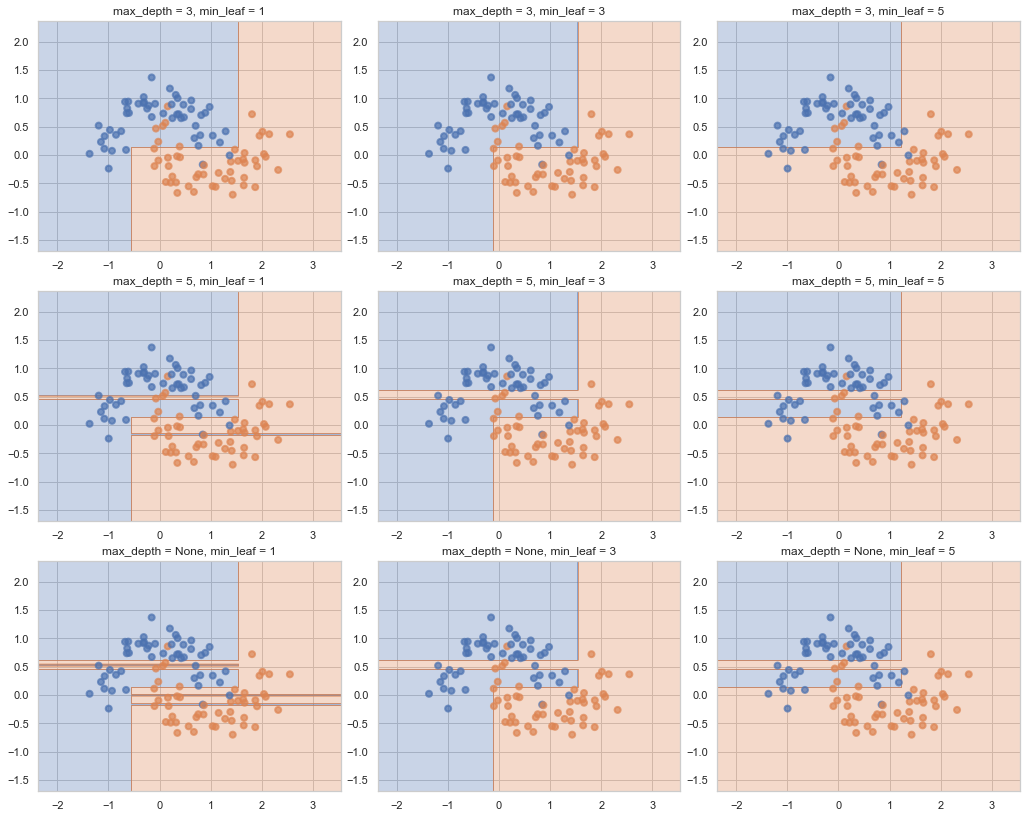

Best validation score: 0.8125
Test score: 1.0


In [11]:
plt.figure(figsize=(15, 12))
train_scores = []
test_scores = []
x, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_params = 0, 0
best_val_score = 0

i = 0
for max_depth in [3, 5, None]:
    for min_samples_leaf in [1, 3, 5]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        val_score = accuracy_score(y_val, model.predict(X_val))

        if val_score > best_val_score:
            best_val_score = val_score
            best_params = max_depth, min_samples_leaf
            
        plt.subplot(3, 3, i + 1)
        plot_surface(model, x, y)
        plt.title(f'max_depth = {max_depth}, min_leaf = {min_samples_leaf}')
        
        i += 1
        
plt.show()

model = DecisionTreeClassifier(max_depth=best_params[0], min_samples_leaf=best_params[1])
model.fit(X_train, y_train)
test_score = accuracy_score(y_test, model.predict(X_test))
print(f'Best validation score: {best_val_score}')
print(f'Test score: {test_score}')

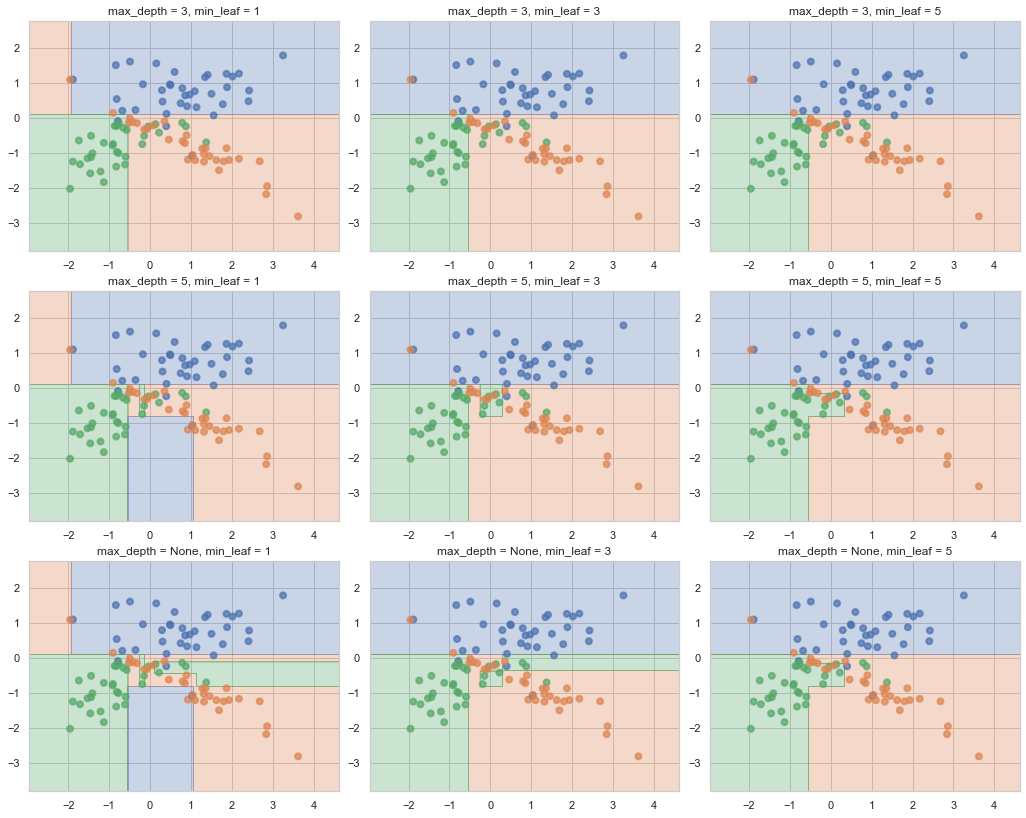

Best validation score: 1.0
Test score: 0.75


In [11]:
plt.figure(figsize=(15, 12))
train_scores = []
test_scores = []
x, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

best_params = 0, 0
best_val_score = 0

i = 0
for max_depth in [3, 5, None]:
    for min_samples_leaf in [1, 3, 5]:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)
        val_score = accuracy_score(y_val, model.predict(X_val))

        if val_score > best_val_score:
            best_val_score = val_score
            best_params = max_depth, min_samples_leaf
            
        plt.subplot(3, 3, i + 1)
        plot_surface(model, x, y)
        plt.title(f'max_depth = {max_depth}, min_leaf = {min_samples_leaf}')
        
        i += 1
        
plt.show()

model = DecisionTreeClassifier(max_depth=best_params[0], min_samples_leaf=best_params[1])
model.fit(X_train, y_train)
test_score = accuracy_score(y_test, model.predict(X_test))
print(f'Best validation score: {best_val_score}')
print(f'Test score: {test_score}')

__Ответ:__ С ростом максимальной глубины разделяющая поверхность становится всё более сложной, что прослеживается на всех датасетах, модель начинает переобучаться. С ростом же min_samples_leaf, напротив, разделяющая поверхность становится проще.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$

In [12]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

In [112]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)
    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    sorted_idx = np.argsort(feature_vector)
    sorted_feat = feature_vector[sorted_idx]
    sorted_targ = target_vector[sorted_idx]
    
    thresholds = (sorted_feat[:-1] + sorted_feat[1:]) / 2
    mask = (sorted_feat[:-1] != sorted_feat[1:])
    R_l = np.arange(1, len(feature_vector)) # +
    R_r = np.flip(R_l, axis=0) # +
    
    p1_l = np.cumsum(sorted_targ)[:-1] / R_l # +
    p0_l = 1 - p1_l
    HR_l = 1 - p1_l**2 - p0_l**2 # +
    
    rev_target = np.flip(sorted_targ, axis=0)
    p1_r_sum = np.flip(np.cumsum(rev_target)[:-1], axis=0)
    p1_r = p1_r_sum / R_r # +
    p0_r = 1 - p1_r
    HR_r = 1 - p1_r**2 - p0_r**2
    
    R = len(feature_vector)
    ginis = - R_l / R * HR_l - R_r / R * HR_r
    
    ginis = ginis[mask]
    thresholds = thresholds[mask]
    if len(ginis) == 0:
        return [], [], None, None
    best_idx = np.argmax(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    return thresholds, ginis, threshold_best, gini_best#, HR_l

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self.feature_types = feature_types
        self._max_depth = max_depth
        self.max_depth = max_depth
        self._min_samples_split = min_samples_split
        self.min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=1):
        if np.all(sub_y == sub_y[0]): # 1
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        
        if self.max_depth is not None:
            if self.max_depth <= depth:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        
        if self.min_samples_split is not None:
            if len(sub_y) < self.min_samples_split:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]): # 8
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count # 2 наоборот
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) # 4
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature]))) # 6
            else:
                raise ValueError

            if len(feature_vector) <= 1: #3 #== 3
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini is not None and (gini_best is None or gini > gini_best): # bug
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": # 7
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] # 5
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        
        if self.min_samples_leaf is not None:
            if len(sub_y[split]) < self.min_samples_leaf or len(sub_y[np.logical_not(split)]) < self.min_samples_leaf:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], depth + 1) # 7

    def _predict_node(self, x, node):
        while (1):
            if node['type'] == "terminal":
                return node['class']

            feat_to_split = node["feature_split"]

            if self._feature_types[feat_to_split] == "real":
                if x[feat_to_split] < node["threshold"]:
                    node = node["left_child"]
                    continue
                node = node["right_child"]
                continue

            elif self._feature_types[feat_to_split] == "categorical":
                if x[feat_to_split] in node["categories_split"]:
                    node = node["left_child"]
                    continue
                node = node["right_child"]
                continue
            else:
                raise ValueError
            
        
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
df = pd.read_csv('students.csv')

In [15]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [16]:
X = df.drop(columns=[' UNS']).values
y = df[' UNS'].values

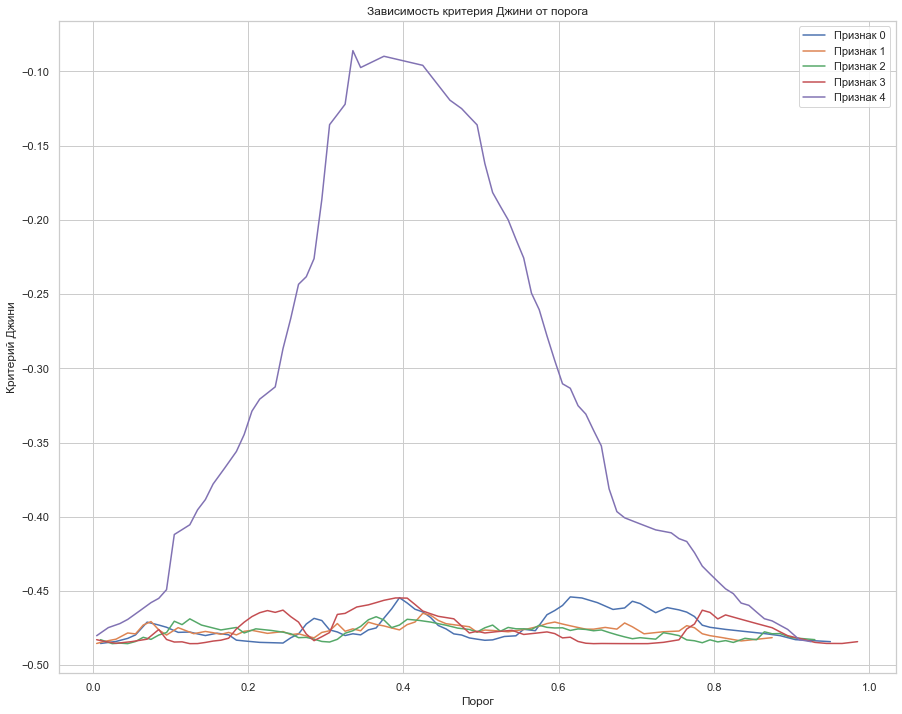

In [17]:
fig, ax = plt.subplots(figsize=(15,12))
plt.title('Зависимость критерия Джини от порога')
ax.set_xlabel('Порог')
ax.set_ylabel('Критерий Джини')

for i in range(5):
    trash, ginis, best_gini, best_trash = find_best_split(X[:,i], y)
    plt.plot(trash, ginis, label=f'Признак {i}')

ax.legend()
plt.show()


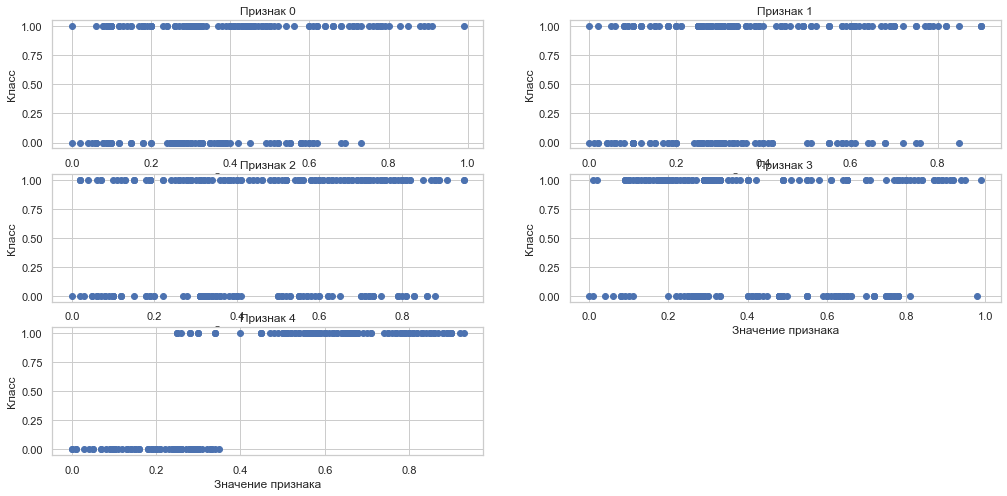

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(17,8))

for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.scatter(X[:,i], y)
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
    plt.title(f'Признак {i}')

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Видим, что лучший для этого признак - 4, это видно как из графика с критерием, так и из графика с распределением таргета.

У нас отличный пример хорошнй кривой для разделения - она сначала идёт вверх, а потом начиная падать. Идеальный вариант - когда получается что-то на подобии треугольника (концом вверх), худший же, когда идут просто хаотичные флуктуации вокруг какой то константной прямой.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [19]:
df = pd.read_table('agaricus-lepiota.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [25]:
from sklearn.preprocessing import LabelEncoder
from numpy.random import shuffle

In [21]:
y = np.where(df[0] == 'p', 1, 0)
X = np.zeros((df.shape[0], df.shape[1] - 1))
for col in df.drop(columns=[0]).columns:
    coder = LabelEncoder()
    X[:, col - 1] = coder.fit_transform(df[col])

In [26]:
idx = np.arange(X.shape[0])
shuffle(idx)
y = y[idx]
X = X[idx]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [28]:
model = DecisionTree(['categorical'] * X.shape[1])
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy : {score}')

Accuracy : 0.999015263417036


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [84]:
df1 = pd.read_table('agaricus-lepiota.data', sep=',', header=None)
df2 = pd.read_table('tic-tac-toe.data', sep=',', header=None)
df3 = pd.read_table('car.data', sep=',', header=None) 
df4 = pd.read_table('nursery.data', sep=',', header=None)

In [100]:
arr_table = []

In [101]:
y = np.where(df1[0] == 'p', 1, 0)
X = np.zeros((df1.shape[0], df1.shape[1] - 1))
for col in df1.drop(columns=[0]).columns:
    coder = LabelEncoder()
    X[:, col - 1] = coder.fit_transform(df1[col])

idx = np.arange(X.shape[0])
shuffle(idx)
y = y[idx]
X = X[idx]
    
Xs = [X]
ys = [y]
# -----------------
y = np.where(df2[9] == 'positive', 1, 0)
X = np.zeros((df2.shape[0], df2.shape[1] - 1))
for col in df2.drop(columns=[9]).columns:
    coder = LabelEncoder()
    X[:, col - 1] = coder.fit_transform(df2[col])

idx = np.arange(X.shape[0])
shuffle(idx)
y = y[idx]
X = X[idx]

Xs.append(X)
ys.append(y)

#------------

y = np.where(df3[6].isin(['good', 'vgood']), 1, 0)
X = np.zeros((df3.shape[0], df3.shape[1] - 1))
for col in df3.drop(columns=[6]).columns:
    coder = LabelEncoder()
    X[:, col - 1] = coder.fit_transform(df3[col])

idx = np.arange(X.shape[0])
shuffle(idx)
y = y[idx]
X = X[idx]    
    
Xs.append(X)
ys.append(y)

# ------------------

y = np.where(df4[8].isin(['very_recom', 'priority', 'spec_prior']), 1, 0)
X = np.zeros((df4.shape[0], df4.shape[1] - 1))
for col in df4.drop(columns=[8]).columns:
    coder = LabelEncoder()
    X[:, col - 1] = coder.fit_transform(df4[col])

idx = np.arange(X.shape[0])
shuffle(idx)
y = y[idx]
X = X[idx]    
    
Xs.append(X)
ys.append(y)

**ВСТАВКА С БОНУСОМ**

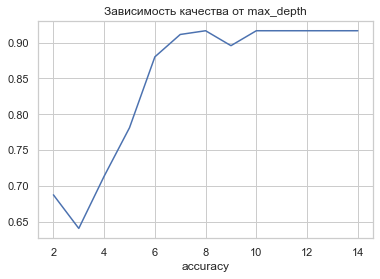

In [114]:
X, y = Xs[1], ys[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scores = []
for max_depth in np.arange(2, 15):
    model = DecisionTree(['categorical'] * X.shape[1], max_depth=max_depth)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    
plt.plot(np.arange(2, 15), scores)
plt.title('Зависимость качества от max_depth')
plt.xlabel('max_depth')
plt.xlabel('accuracy')
plt.show()

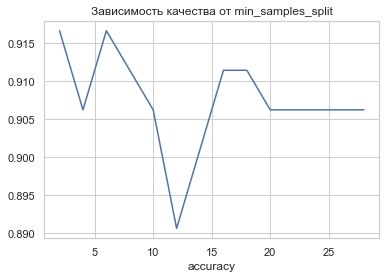

In [117]:
scores = []
for min_samples_split in np.arange(2, 30, 2):
    model = DecisionTree(['categorical'] * X.shape[1], min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    
plt.plot(np.arange(2, 30, 2), scores)
plt.title('Зависимость качества от min_samples_split')
plt.xlabel('min_samples_split')
plt.xlabel('accuracy')
plt.show()

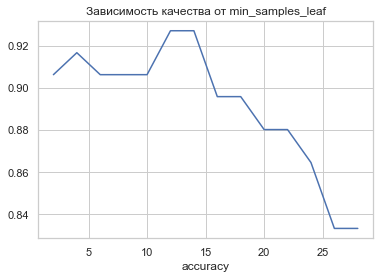

In [118]:
scores = []
for min_samples_leaf in np.arange(2, 30, 2):
    model = DecisionTree(['categorical'] * X.shape[1], min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    
plt.plot(np.arange(2, 30, 2), scores)
plt.title('Зависимость качества от min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.xlabel('accuracy')
plt.show()

**Конец вставки с бонусом**

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [103]:
df_names  = {0 : 'mushrooms',
             1 : 'tic-tac-toe',
             2 : 'cars',
             3 : 'nursery'}

In [104]:
arr_table.append([])
for i in range(len(Xs)):
    model = DecisionTree(['real'] * Xs[i].shape[1])
    scores = cross_val_score(model, Xs[i], ys[i], cv=10, scoring=make_scorer(accuracy_score))
    arr_table[0].append(scores.mean())
    scores = list(map(lambda x: round(x, 3), scores))
    print(f'Для датасета {df_names[i]} accuracy: {scores}')

Для датасета mushrooms accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Для датасета tic-tac-toe accuracy: [0.781, 0.896, 0.854, 0.875, 0.906, 0.844, 0.906, 0.792, 0.926, 0.863]
Для датасета cars accuracy: [0.988, 0.988, 0.988, 1.0, 1.0, 0.988, 0.994, 0.994, 0.965, 0.983]
Для датасета nursery accuracy: [1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.999, 1.0, 1.0, 1.0]


In [105]:
arr_table.append([])
for i in range(len(Xs)):
    model = DecisionTree(['categorical'] * Xs[i].shape[1])
    scores = cross_val_score(model, Xs[i], ys[i], cv=10, scoring=make_scorer(accuracy_score))
    arr_table[1].append(scores.mean())
    scores = list(map(lambda x: round(x, 3), scores))
    print(f'Для датасета {df_names[i]} accuracy: {scores}')

Для датасета mushrooms accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Для датасета tic-tac-toe accuracy: [0.948, 0.958, 0.948, 0.979, 0.958, 0.896, 0.979, 0.906, 0.958, 0.958]
Для датасета cars accuracy: [0.988, 0.988, 0.988, 1.0, 0.994, 0.988, 0.994, 0.994, 0.965, 0.977]
Для датасета nursery accuracy: [1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.999, 1.0, 1.0, 1.0]


In [106]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
arr_table.append([])
for i in range(len(Xs)):
    coder = OneHotEncoder(sparse=False)
    X = coder.fit_transform(Xs[i])
    model = DecisionTree(['real'] * X.shape[1])
    scores = cross_val_score(model, X, ys[i], cv=10, scoring=make_scorer(accuracy_score))
    arr_table[2].append(scores.mean())
    scores = list(map(lambda x: round(x, 3), scores))
    print(f'Для датасета {df_names[i]} accuracy: {scores}')

Для датасета mushrooms accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Для датасета tic-tac-toe accuracy: [0.948, 0.958, 0.948, 0.979, 0.958, 0.896, 0.979, 0.906, 0.958, 0.958]
Для датасета cars accuracy: [0.988, 0.977, 0.983, 0.988, 0.994, 0.988, 0.988, 0.988, 0.977, 0.983]
Для датасета nursery accuracy: [1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.999, 1.0, 1.0, 1.0]


In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
arr_table.append([])
for i in range(len(Xs)):
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, Xs[i], ys[i], cv=10, scoring=make_scorer(accuracy_score))
    arr_table[3].append(scores.mean())
    scores = list(map(lambda x: round(x, 3), scores))
    print(f'Для датасета {df_names[i]} accuracy: {scores}')

Для датасета mushrooms accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Для датасета tic-tac-toe accuracy: [0.792, 0.875, 0.844, 0.875, 0.906, 0.812, 0.875, 0.833, 0.884, 0.863]
Для датасета cars accuracy: [0.988, 0.988, 0.971, 1.0, 0.994, 0.988, 0.994, 0.988, 0.977, 0.994]
Для датасета nursery accuracy: [1.0, 1.0, 1.0, 0.999, 1.0, 0.999, 0.999, 1.0, 1.0, 1.0]


In [110]:
arr_table = np.array(arr_table)
table = pd.DataFrame(arr_table.T,
                     index=[df_names[i] for i in range(4)],
                     columns = ['categorical', 'real', 'real+ohe', 'sklearn'])
table.head()

,categorical,real,real+ohe,sklearn
mushrooms,1.000000,1.000000,1.000000,1.000000
tic-tac-toe,0.864364,0.948871,0.948871,0.855987
cars,0.988987,0.987828,0.985526,0.988423
nursery,0.999769,0.999769,0.999769,0.999769


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Алгоритмы ранжируются одинаково - на грибах имеем лучшее качество, на крестиках-ноликах всегда худшее, а машины всегда немного хуже nursery. Вероятно, на самом деле все модели достаточно хорошего качества, просто в данных присутствует шум, из-за которого и невозможно добиться идеального качества.

Кажется, вторая часть вопроса намекает на то, что некоторые данные были отсотированы, но я этоу уже исправил, качество, кстати, улучшилось почти на всех наборах (особенно на крестиках-ноликах).